In [5]:
import numpy as np
import pandas as pd
from itertools import combinations
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
%matplotlib inline
import random
from matplotlib.pyplot import figure

Lets create a list of combinations from 3.7V to 4.2V

In [ ]:
test_list = [3.7, 3.8, 3.9, 4.0, 4.1, 4.2]
PAIRS = list(combinations(test_list, 2))

In [6]:
PAIRS

[(3.7, 3.8),
 (3.7, 3.9),
 (3.7, 4.0),
 (3.7, 4.1),
 (3.7, 4.2),
 (3.8, 3.9),
 (3.8, 4.0),
 (3.8, 4.1),
 (3.8, 4.2),
 (3.9, 4.0),
 (3.9, 4.1),
 (3.9, 4.2),
 (4.0, 4.1),
 (4.0, 4.2),
 (4.1, 4.2)]

Write a function to extract DECVD of the pairs in the list and the SOH

In [3]:
def crunchData(excel_filename , batteryNo):
    
    excel_df = pd.read_excel(r'C:\\Users\Marvin\\Desktop\\calce datasets\\CS2_'+batteryNo+'\\'
                             + excel_filename,
                             sheet_name=1, usecols='B,C,D:L',engine='openpyxl' )
    
    CycleGroups = excel_df[excel_df.Step_Index == 2].groupby('Cycle_Index')
    groups = excel_df.groupby('Cycle_Index')
    df = pd.DataFrame(columns=PAIRS)
    ratedCap = 1.1 #1100mAh
    lstSOH = []
    lstDateTime = []
    
    for pair in PAIRS:

        lstDECVD = []

        for cycle in range(2, excel_df['Cycle_Index'].max()+1):

            #get voltage pair index
            btmRange = CycleGroups.get_group(cycle)['Voltage(V)'].gt(pair[0]).idxmax()
            topRange = CycleGroups.get_group(cycle)['Voltage(V)'].gt(pair[1]).idxmax()

            #get time difference, add to list
            decvd = CycleGroups.get_group(cycle)['Step_Time(s)'][topRange] - CycleGroups.get_group(cycle)['Step_Time(s)'][btmRange]
            lstDECVD.append(decvd)
            
        df[pair] = lstDECVD

    for cycle in range(2, excel_df['Cycle_Index'].max()+1):

            #get charge capacity
            chargeCap = groups.get_group(cycle)['Charge_Capacity(Ah)'].max() - \
                                groups.get_group(cycle)['Charge_Capacity(Ah)'].min()
            
            SOH = (chargeCap / ratedCap) * 100
            lstSOH.append(SOH) 
            lstDateTime.append(CycleGroups.get_group(cycle)['Date_Time'].min())
            
    
    df['SOH'] = lstSOH 
    df['ID'] = batteryNo
    df['Date_Time'] = lstDateTime
    
    return df

Apply the function in a for loop to loop through all the excel files

In [4]:
# Credits to the data source
# https://web.calce.umd.edu/batteries/data.htm
# Prismatic cells - CS2

import os

df = pd.DataFrame()


for i, battery in enumerate([35,36,37,38]):

    batteryNo = str(battery) #35 36 37 38
    files = os.listdir(r'C:\Users\Marvin\Desktop\calce datasets\CS2_'+batteryNo)

    #Read excel, apply crunchData function, append to DF, repeat for all files in folder
    for file in files: 
        df = pd.concat([crunchData(file,batteryNo),df] , ignore_index=True)
        print(file, 'DONE')

df.sort_values(['ID', 'Date_Time'], ascending=[True, True], inplace=True)
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)
df['Cycle'] = df.groupby("ID")["Date_Time"].rank(method="first", ascending=True)
    
print('ALL DONE')

CS2_35_10_15_10.xlsx DONE
CS2_35_10_22_10.xlsx DONE
CS2_35_10_29_10.xlsx DONE
CS2_35_11_01_10.xlsx DONE
CS2_35_11_08_10.xlsx DONE
CS2_35_11_23_10.xlsx DONE
CS2_35_11_24_10.xlsx DONE
CS2_35_12_06_10.xlsx DONE
CS2_35_12_13_10.xlsx DONE
CS2_35_12_20_10.xlsx DONE
CS2_35_12_23_10.xlsx DONE
CS2_35_1_10_11.xlsx DONE
CS2_35_1_18_11.xlsx DONE
CS2_35_1_24_11.xlsx DONE
CS2_35_1_28_11.xlsx DONE
CS2_35_2_10_11.xlsx DONE
CS2_35_2_4_11.xlsx DONE
CS2_35_8_17_10.xlsx DONE
CS2_35_8_18_10.xlsx DONE
CS2_35_8_19_10.xlsx DONE
CS2_35_8_30_10.xlsx DONE
CS2_35_9_21_10.xlsx DONE
CS2_35_9_30_10.xlsx DONE
CS2_35_9_7_10.xlsx DONE
CS2_35_9_8_10.xlsx DONE
CS2_36_10_04_10.xlsx DONE
CS2_36_10_05_10.xlsx DONE
CS2_36_10_14_10.xlsx DONE
CS2_36_10_21_10.xlsx DONE
CS2_36_10_28_10.xlsx DONE
CS2_36_11_01_10.xlsx DONE
CS2_36_11_15_10.xlsx DONE
CS2_36_11_22_10.xlsx DONE
CS2_36_11_24_10.xlsx DONE
CS2_36_12_06_10.xlsx DONE
CS2_36_12_13_10.xlsx DONE
CS2_36_12_20_10.xlsx DONE
CS2_36_12_23_10.xlsx DONE
CS2_36_1_10_11.xlsx DONE
CS2_

In [7]:
df

,"(3.7, 3.8)","(3.7, 3.9)","(3.7, 4.0)","(3.7, 4.1)","(3.7, 4.2)","(3.8, 3.9)","(3.8, 4.0)","(3.8, 4.1)","(3.8, 4.2)","(3.9, 4.0)","(3.9, 4.1)","(3.9, 4.2)","(4.0, 4.1)","(4.0, 4.2)","(4.1, 4.2)",SOH,ID,Date_Time,Cycle
0,630.318828,2221.123148,4292.154768,5552.792227,6424.641171,1590.804319,3661.835939,4922.473399,5794.322343,2071.031620,3331.669079,4203.518023,1260.637459,2132.486403,871.848944,103.345357,35,2010-08-19 17:59:42,1.0
1,690.350301,2401.218605,4352.209084,5582.833934,6449.119782,1710.868305,3661.858784,4892.483634,5758.769482,1950.990479,3181.615329,4047.901177,1230.624850,2096.910698,866.285848,102.927404,35,2010-08-19 21:35:39,2.0
2,720.366060,2431.219982,4352.196522,5582.806419,6439.843013,1710.853922,3631.830462,4862.440358,5719.476953,1920.976540,3151.586436,4008.623031,1230.609896,2087.646491,857.036595,102.641929,35,2010-08-20 01:09:04,3.0
3,630.319311,2221.124363,4232.141792,5462.764392,6339.892086,1590.805052,3601.822481,4832.445081,5709.572775,2011.017429,3241.640029,4118.767723,1230.622600,2107.750294,877.127694,101.846262,35,2010-08-20 04:41:25,4.0
4,600.303530,2191.092406,4202.093911,5432.716339,6305.609479,1590.788876,3601.790381,4832.412809,5705.305950,2011.001505,3241.623933,4114.517074,1230.622428,2103.515569,872.893141,100.938896,35,2010-08-20 08:13:30,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3926,0.000000,0.000000,90.045232,360.181250,909.984363,0.000000,90.045232,360.181250,909.984363,90.045232,360.181250,909.984363,270.136018,819.939131,549.803113,27.194144,38,2011-02-03 13:41:24,1050.0
3927,0.000000,0.000000,60.030187,360.181242,874.953738,0.000000,60.030187,360.181242,874.953738,60.030187,360.181242,874.953738,300.151055,814.923551,514.772496,26.518512,38,2011-02-03 15:09:14,1051.0
3928,0.000000,0.000000,60.030187,360.181242,874.953738,0.000000,60.030187,360.181242,874.953738,60.030187,360.181242,874.953738,300.151055,814.923551,514.772496,26.518512,38,2011-02-03 15:09:14,1052.0
3929,0.000000,0.000000,90.043387,360.179344,898.248338,0.000000,90.043387,360.179344,898.248338,90.043387,360.179344,898.248338,270.135957,808.204951,538.068994,26.839985,38,2011-02-03 16:36:06,1053.0


In [68]:
df.corr(method='pearson')

,"(3.7, 3.8)","(3.7, 3.9)","(3.7, 4.0)","(3.7, 4.1)","(3.7, 4.2)","(3.8, 3.9)","(3.8, 4.0)","(3.8, 4.1)","(3.8, 4.2)","(3.9, 4.0)","(3.9, 4.1)","(3.9, 4.2)","(4.0, 4.1)","(4.0, 4.2)","(4.1, 4.2)",SOH,ID,Cycle
"(3.7, 3.8)",1.000000,0.982677,0.923977,0.891229,0.878960,0.967624,0.896059,0.859178,0.845786,0.804666,0.759719,0.743746,0.597617,0.579020,0.506412,0.864190,-0.085493,-0.927522
"(3.7, 3.9)",0.982677,1.000000,0.975075,0.954360,0.945241,0.997435,0.958143,0.932635,0.922028,0.890398,0.855395,0.841049,0.709473,0.688222,0.603947,0.933034,-0.040787,-0.941400
"(3.7, 4.0)",0.923977,0.975075,1.000000,0.994942,0.990478,0.986133,0.997658,0.987163,0.980827,0.969078,0.945607,0.933994,0.819864,0.797914,0.706860,0.983206,-0.012183,-0.924881
"(3.7, 4.1)",0.891229,0.954360,0.994942,1.000000,0.999121,0.970382,0.997694,0.997743,0.995100,0.981809,0.970960,0.963390,0.873057,0.853579,0.766237,0.995358,-0.009794,-0.906850
"(3.7, 4.2)",0.878960,0.945241,0.990478,0.999121,1.000000,0.962598,0.994709,0.998588,0.997802,0.982799,0.976772,0.971480,0.889812,0.873216,0.792306,0.997864,-0.010352,-0.898873
"(3.8, 3.9)",0.967624,0.997435,0.986133,0.970382,0.962598,1.000000,0.973704,0.952937,0.943538,0.915905,0.885194,0.871638,0.747084,0.725007,0.636941,0.951524,-0.023124,-0.938065
"(3.8, 4.0)",0.896059,0.958143,0.997658,0.997694,0.994709,0.973704,1.000000,0.994419,0.989457,0.983123,0.963924,0.953289,0.846805,0.824612,0.731684,0.988920,0.001153,-0.909545
"(3.8, 4.1)",0.859178,0.932635,0.987163,0.997743,0.998588,0.952937,0.994419,1.000000,0.998996,0.990039,0.984477,0.978306,0.897988,0.878748,0.790815,0.996564,0.001550,-0.886958
"(3.8, 4.2)",0.845786,0.922028,0.980827,0.995100,0.997802,0.943538,0.989457,0.998996,1.000000,0.988852,0.988420,0.984735,0.913738,0.897748,0.817243,0.997509,0.000340,-0.877532
"(3.9, 4.0)",0.804666,0.890398,0.969078,0.981809,0.982799,0.915905,0.983123,0.990039,0.988852,1.000000,0.990690,0.982810,0.894934,0.873487,0.780226,0.981502,0.020524,-0.851934


SOH has a high linear correlation with DECVD

Split and save the df into the 4 datasets for easy visualisation

In [ ]:
df35 = df.groupby('ID').get_group('35')
df36 = df.groupby('ID').get_group('36')
df37 = df.groupby('ID').get_group('37')
df38 = df.groupby('ID').get_group('38')

In [51]:
df35.to_csv('df35.csv',index=False)
df36.to_csv('df36.csv',index=False)
df37.to_csv('df37.csv',index=False)
df38.to_csv('df38.csv',index=False)

In [194]:
df35 = pd.read_csv('df35.csv')
df36 = pd.read_csv('df36.csv')
df37 = pd.read_csv('df37.csv')
df38 = pd.read_csv('df38.csv')

Visualise the data

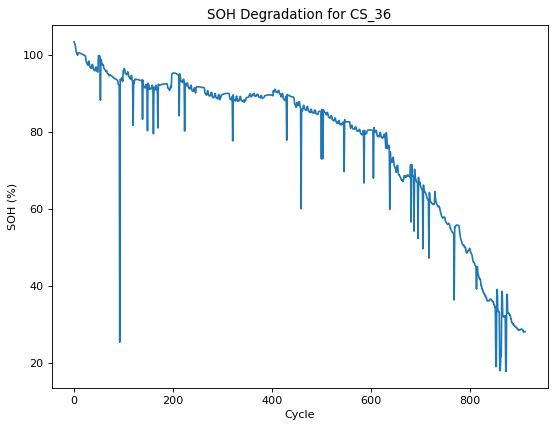

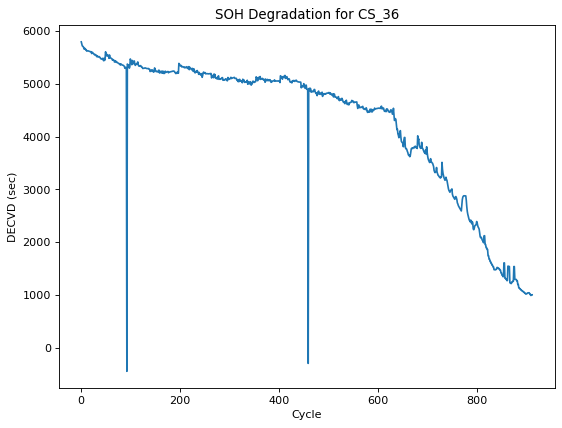

In [195]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plt.plot(df35['Cycle'],df35['SOH'])
plt.xlabel('Cycle')
plt.ylabel('SOH (%)')
plt.title('SOH Degradation for CS_36')
plt.show()

figure(figsize=(8, 6), dpi=80)
plt.plot(df35['Cycle'],df35['(3.8, 4.2)'])
plt.xlabel('Cycle')
plt.ylabel('DECVD (sec)')
plt.title('SOH Degradation for CS_36')
plt.show()

Doesnt seem right, SOH cannot spike downward and recover back to the trend.
Some samples have a DECVD of less than 0; not possible since that would mean the
upper voltage was reached first before the lower

Lets apply a median filter to clean out the spikes

In [196]:
from scipy.signal import medfilt

length = 5

for x in range(1,16):
    df35.iloc[:,x] = medfilt(df35.iloc[:,x],kernel_size=length)
    df36.iloc[:,x] = medfilt(df36.iloc[:,x],kernel_size=length)
    df37.iloc[:,x] = medfilt(df37.iloc[:,x],kernel_size=length)
    df38.iloc[:,x] = medfilt(df38.iloc[:,x],kernel_size=length)

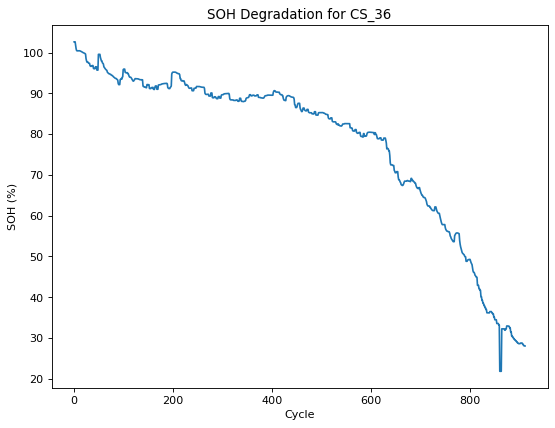

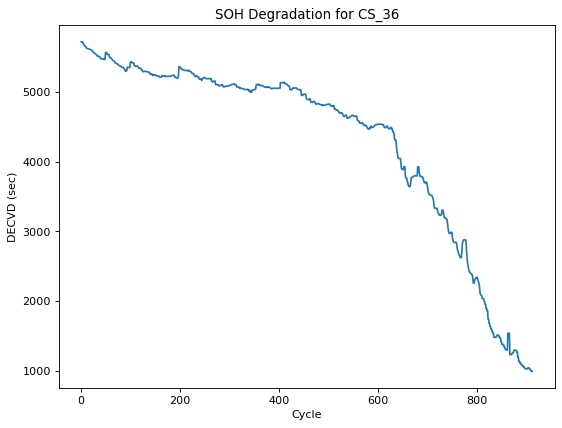

In [197]:
figure(figsize=(8, 6), dpi=80)
plt.plot(df35['Cycle'],df35['SOH'])
plt.xlabel('Cycle')
plt.ylabel('SOH (%)')
plt.title('SOH Degradation for CS_36')
plt.show()

figure(figsize=(8, 6), dpi=80)
plt.plot(df35['Cycle'],df35['(3.8, 4.2)'])
plt.xlabel('Cycle')
plt.ylabel('DECVD (sec)')
plt.title('SOH Degradation for CS_36')
plt.show()

Write the ELM functions

In [198]:
def predict(x):
    xh = input_to_hidden(x)
    y = np.dot(xh, Wout) #+ np.dot(x, WDirect) 
    return y
    
def input_to_hidden(x):
    a = np.dot(x, Win) + 0.1
    #a = sigmoid(a)
    a = np.maximum(a, 0) # ReLU
    #a = np.where(x > 0, x, x * 0.01) #leaky ReLu
    return a

Time to make some predictions

MAE:  0.8460976420445009
RMSE:  1.345055350650282


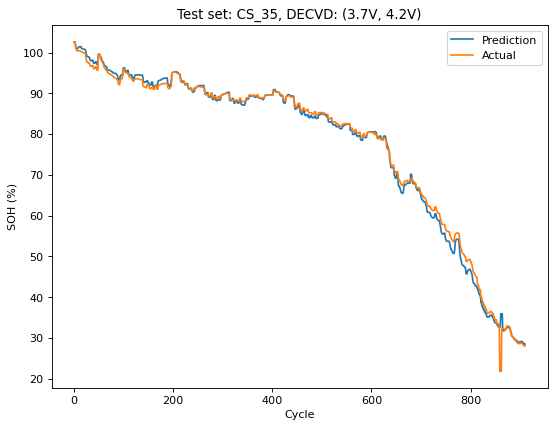

In [199]:
selection = '(3.7, 4.2)'
no_hidden_neurons = 10

x_train = pd.concat([df36,df37,df38]).loc[:,selection].values.reshape(-1,1)
y_train = pd.concat([df36,df37,df38]).loc[:,'SOH'].values.reshape(-1,1)

x_test = df35.loc[:,selection].values.reshape(-1,1)
y_test = df35.loc[:,'SOH'].values.reshape(-1,1)

INPUT_LENGHT = x_train.shape[1] 
HIDDEN_UNITS = no_hidden_neurons 

Win = np.random.normal(size=[INPUT_LENGHT, HIDDEN_UNITS]) #randomise input weights

X = input_to_hidden(x_train)
Wout, resi, rank, s = np.linalg.lstsq(X,y_train, rcond=None) #hidden to output weights

y = predict(x_test)

print('MAE: ',mean_absolute_error(y,y_test))
print('RMSE: ',mean_squared_error(y,y_test,squared=False))

from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
plt.title('Test set: CS_35'+', DECVD: '+selection[:4]+'V, '+selection[-4:-1]+'V)')
plt.xlabel('Cycle')
plt.ylabel('SOH (%)')
plt.plot(y,label='Prediction')
plt.plot(y_test,label='Actual')
plt.legend()

Looks good but 3.7V to 4.2V might take a long time to charge
So the predictions will have to be delayed for longer
Lets look at some time comparisons for different voltage ranges

In [166]:
df = pd.concat([df35,df36,df37,df38])
print('3.7, 4.2 -> '+str(df['(3.7, 4.2)'].mean()))
print('3.8, 4.2 -> '+str(df['(3.8, 4.2)'].mean()))
print('3.8, 4.1 -> '+str(df['(3.8, 4.1)'].mean()))
print('3.8, 4.0 -> '+str(df['(3.8, 4.0)'].mean()))
print('3.9, 4.0 -> '+str(df['(3.9, 4.0)'].mean()))

3.7, 4.2 -> 4494.7064561803745
3.8, 4.2 -> 4226.179546937455
3.8, 4.1 -> 3407.2589610411314
3.8, 4.0 -> 2349.874783932775
3.9, 4.0 -> 1466.7841343938965


Lets initialise multiple ELMs with the same data and see the results 

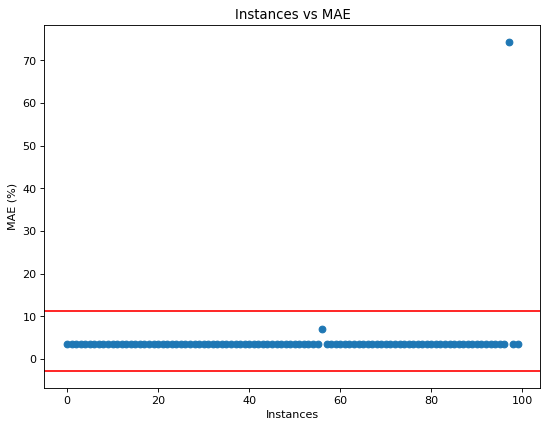

In [181]:
from timeit import default_timer as timer
selection = '(3.9, 4.0)'
mae = np.array([])
nodes = np.array([])
times = np.array([])
instances = np.array([])

x_train = pd.concat([df35,df37,df38]).loc[:,selection].values.reshape(-1,1)
y_train = pd.concat([df35,df37,df38]).loc[:,'SOH'].values.reshape(-1,1)

x_test = df36.loc[:,selection].values.reshape(-1,1)
y_test = df36.loc[:,'SOH'].values.reshape(-1,1)

for x in range(100):    
    
    start = timer()
    INPUT_LENGHT = x_train.shape[1] 
    HIDDEN_UNITS = 10 #random.randint(200,400) 

    Win = np.random.normal(size=[INPUT_LENGHT, HIDDEN_UNITS]) #randomise input weights

    X = input_to_hidden(x_train)
    Wout, resi, rank, s = np.linalg.lstsq(X,y_train, rcond=None) #hidden to output weights
    
    y = predict(x_test)

    end = timer()
    mae = np.append(mean_absolute_error(y,y_test),mae)
    instances = np.append(x,instances)
    #print(mean_absolute_error(y,y_test))
    #print(mean_squared_error(y,y_test,squared=False))
    #print(end-start)
    
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
plt.figure(1)
plt.title('Instances vs MAE')
plt.xlabel('Instances')
plt.ylabel('MAE (%)')
plt.axhline(y=mae.std()+mae.mean(),xmin=0,xmax=100, color='r')
plt.axhline(y=mae.mean()-mae.std(),xmin=0,xmax=100, color='r')
plt.scatter(instances,mae)
plt.show()



The random input weights can lead to a bad learner
This decreases the reliability of the model
We can filter out the bad learners with Z-score filtering

In [182]:
mae.std()

7.055221723836575

In [183]:
mae.mean()

4.200973522886013

In [184]:
new_mae = mae[mae < mae.std() + mae.mean()]

In [185]:
new_mae.std()

0.35807660025041044

In [186]:
new_mae.mean()

3.4928017629938672

By removing outliers, the MAE decreased from 4.2% to 3.5%

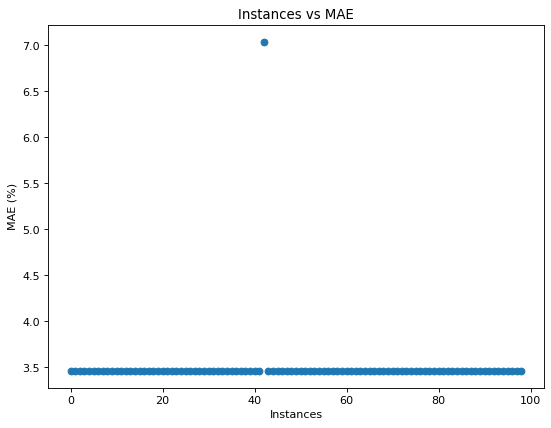

In [187]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
plt.title('Instances vs MAE')
plt.xlabel('Instances')
plt.ylabel('MAE (%)')
plt.scatter([x for x in range(len(new_mae))],new_mae)
#plt.axhline(y=new_mae.mean(),xmin=0,xmax=50, color='r')

In [188]:
len(new_mae)

99

We can write an ELM class to easily create the object and make predictions

In [200]:
class ELM:       
    
    def __init__(self,hidden_neurons):
        self.hidden_neurons = hidden_neurons
    
    def fit(self,X_train,y_train):
        HIDDEN_UNITS = self.hidden_neurons
        INPUT_LENGHT = X_train.shape[1] 
        Win = np.random.normal(size=[INPUT_LENGHT, HIDDEN_UNITS])
        a = np.dot(X_train, Win) + 0.1
        X = np.maximum(a,0)
        Wout, resi, rank, s = np.linalg.lstsq(X,y_train, rcond=None)
        
    def predict(self,X_test):
        xh = np.dot(X_test,Win) + 0.1
        X = np.maximum(xh,0)
        y = np.dot(X,Wout) 
        return y

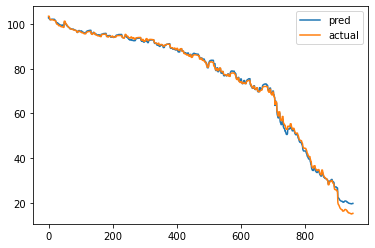

In [201]:
x_train = pd.concat([df35,df37,df38]).loc[:,'(3.7, 4.2)'].values.reshape(-1,1)
y_train = pd.concat([df35,df37,df38]).loc[:,'SOH'].values.reshape(-1,1)

x_test = df36.loc[:,'(3.7, 4.2)'].values.reshape(-1,1)
y_test = df36.loc[:,'SOH'].values.reshape(-1,1)

model = ELM(10)
model.fit(x_train,y_train)
pred = model.predict(x_test)
plt.plot(pred,label='pred')
plt.plot(y_test,label='actual')
plt.legend()

Lets compare ELM to other algorithms (DECVD: 3.7-4.2)

In [89]:
from lazypredict.Supervised import LazyRegressor

selection = '(3.7, 4.2)'

x_train = pd.concat([df35,df36,df38]).loc[:,selection].values.reshape(-1,1)
y_train = pd.concat([df35,df36,df38]).loc[:,'SOH'].values.reshape(-1,1)

x_test = df37.loc[:,selection].values.reshape(-1,1)
y_test = df37.loc[:,'SOH'].values.reshape(-1,1)

model = LazyRegressor()
models,predictions = model.fit(x_train,x_test,y_train,y_test)
models

C:\Users\Marvin\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:05<00:00,  7.09it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GaussianProcessRegressor,1.00,1.00,0.74,0.87
LGBMRegressor,1.00,1.00,0.92,0.09
GradientBoostingRegressor,1.00,1.00,0.97,0.11
KNeighborsRegressor,1.00,1.00,1.05,0.01
HistGradientBoostingRegressor,1.00,1.00,1.05,0.33
SGDRegressor,1.00,1.00,1.16,0.01
Lars,1.00,1.00,1.16,0.01
TransformedTargetRegressor,1.00,1.00,1.16,0.01
OrthogonalMatchingPursuit,1.00,1.00,1.16,0.01


Now with a smaller DECVD range

In [91]:
selection = '(3.9, 4.0)'

x_train = pd.concat([df35,df36,df38]).loc[:,selection].values.reshape(-1,1)
y_train = pd.concat([df35,df36,df38]).loc[:,'SOH'].values.reshape(-1,1)

x_test = df37.loc[:,selection].values.reshape(-1,1)
y_test = df37.loc[:,'SOH'].values.reshape(-1,1)

model = LazyRegressor()
models,predictions = model.fit(x_train,x_test,y_train,y_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:05<00:00,  7.06it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GradientBoostingRegressor,0.98,0.98,2.90,0.12
GaussianProcessRegressor,0.98,0.98,2.97,0.92
LGBMRegressor,0.98,0.98,3.10,0.08
HistGradientBoostingRegressor,0.98,0.98,3.10,0.43
XGBRegressor,0.98,0.98,3.37,0.07
KNeighborsRegressor,0.97,0.97,3.45,0.01
SVR,0.97,0.97,3.47,0.27
NuSVR,0.97,0.97,3.51,0.23
RandomForestRegressor,0.97,0.97,3.54,0.31


For RUL autoregression, we have to prep our data first

In [93]:
from keras.preprocessing.sequence import TimeseriesGenerator

predictions = np.array([])
n_input = 200
lag = n_input

generator35 = TimeseriesGenerator(df35['SOH'].values, df35['SOH'].values, length=n_input, batch_size=len(df35['SOH'].values))
generator36 = TimeseriesGenerator(df36['SOH'].values, df36['SOH'].values, length=n_input, batch_size=len(df36['SOH'].values))
generator37 = TimeseriesGenerator(df37['SOH'].values, df37['SOH'].values, length=n_input, batch_size=len(df37['SOH'].values))
generator38 = TimeseriesGenerator(df38['SOH'].values, df38['SOH'].values, length=n_input, batch_size=len(df38['SOH'].values))

Xseries35 = generator35[0][0]
yseries35 = generator35[0][1]

Xseries36 = generator36[0][0]
yseries36 = generator36[0][1]

Xseries37 = generator37[0][0]
yseries37 = generator37[0][1]

Xseries38 = generator38[0][0]
yseries38 = generator38[0][1]

In [95]:
Xseries37.shape

(816, 200)

In [97]:
yseries37.shape

(816,)

Write an autoregressive function

In [108]:
def rollpred(set,sp):
    start_point = sp
    n_input = 200
    timeseries_data = X_test[start_point]
    x_input = timeseries_data
    temp_input = list(x_input)
    lst_output = []
    i = 0
    no_of_predictions = 700
    n_steps = n_input

    while(i < no_of_predictions):

        if(i>0):
            x_input=np.array(temp_input[1:])
            x_input = x_input.reshape(1, n_steps)
            yhat = model.predict(x_input)
            temp_input = np.append(temp_input,yhat)
            temp_input = temp_input[1:]
            lst_output.append(yhat)
            i = i + 1
        else:
            x_input = x_input.reshape(1, n_steps)
            yhat = model.predict(x_input)
            temp_input = np.append(x_input,yhat)
            lst_output.append(yhat)
            i = i + 1

    cycle_new = np.arange(1,y_test.shape[0]+1+n_input)
    cycle_pred = np.arange(start_point+1+n_input,start_point+1+no_of_predictions+n_input)

    figure(figsize=(8, 6), dpi=80)
    plt.plot(cycle_new,y_total, label='Actual')
    plt.plot(cycle_pred,lst_output,label='Predicted')
    plt.hlines(y=80,xmin=0,xmax=900,linewidth=1, color='r')
    plt.xlabel('Cycle')
    plt.ylabel('SOH (%)')
    plt.legend()
    
    count(lst_output,start_point,n_input)

Write a function to measure the absolute error in cycles from EOL threshold

In [202]:
def count(lst,n_input,start_point):
    for count, value in enumerate(lst):
        a = 0
        if value < 80:
            a = count + n_input + start_point
            print('predicted:', a)
            break

    for count, value in enumerate(y_total):
        if value < 80:
            b = count
            print('Actual:', count)
            break

    print('AE: ', abs(a-b))

In [203]:
X_train = np.concatenate((Xseries36,Xseries37,Xseries38))
y_train = np.concatenate((yseries36,yseries37,yseries38))

X_test = Xseries35
y_test = yseries35

y_total = np.append(X_test[0].reshape(-1,1),y_test.reshape(-1,1))

In [204]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()
model.fit(X_train,y_train)

KNeighborsRegressor()

predicted: 594
Actual: 578
AE:  16


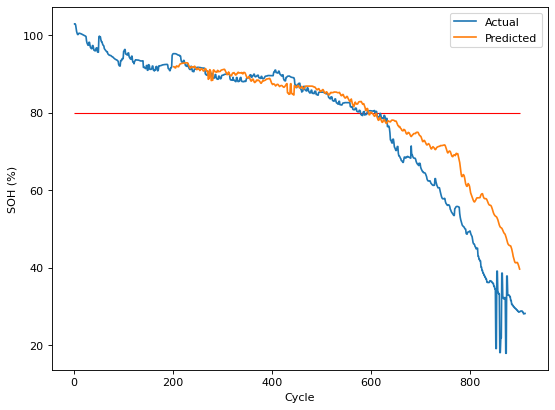

In [205]:
start = 0
rollpred(35,start)